In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('CRData16.csv')

In [4]:
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
x = dataset.iloc[:,[3,7]].values
y = dataset.iloc[:,19].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
imputer = Imputer(missing_values= 'Nan', strategy='mean',axis = 0)

In [6]:
#y_train

In [7]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
y_pred = classifier.predict(x_test)

In [10]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0])

In [11]:
from sklearn.metrics import confusion_matrix #its a function not a class
cm = confusion_matrix(y_test,y_pred)

In [12]:
cm

array([[85,  0],
       [ 0,  7]])

In [13]:
TP = cm[1,1]
FP = cm[0,1]
TN = cm[0,0]
FN = cm[1,0]
Total = TP+FP+TN+FN

In [14]:
Acc = (TP+TN)/Total
Acc

1.0

In [15]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train

In [16]:
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min() -1, stop = x_set[:,0].max()+1,step = 0.01),
                   np.arange(start = x_set[:,1].min() -1, stop = x_set[:,1].max()+1,step = 0.01))

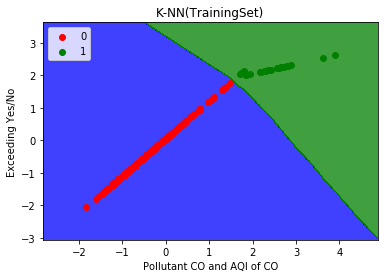

In [17]:
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha = 0.75, 
            cmap =ListedColormap(('blue','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1],
               c = ListedColormap(('red','green'))(i),label = j)

plt.title('K-NN(TrainingSet)')
plt.xlabel('Pollutant CO and AQI of CO')
plt.ylabel('Exceeding Yes/No')
plt.legend()
plt.show()

In [18]:
'''for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1],
               c = ListedColormap(('red','green'))(i),label = j)

plt.title('K-NN(TrainingSet)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
'''

"for i,j in enumerate(np.unique(y_set)):\n    plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1],\n               c = ListedColormap(('red','green'))(i),label = j)\n\nplt.title('K-NN(TrainingSet)')\nplt.xlabel('Age')\nplt.ylabel('Estimated Salary')\nplt.legend()\nplt.show()\n"

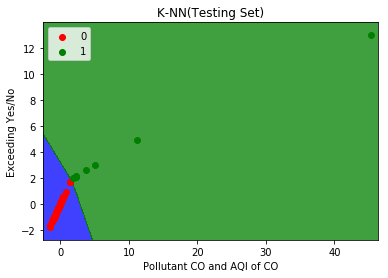

In [19]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min() -1, stop = x_set[:,0].max()+1,step = 0.01),
                   np.arange(start = x_set[:,1].min() -1, stop = x_set[:,1].max()+1,step = 0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha = 0.75, 
            cmap =ListedColormap(('blue','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1],
               c = ListedColormap(('red','green'))(i),label = j)

plt.title('K-NN(Testing Set)')
plt.xlabel('Pollutant CO and AQI of CO')
plt.ylabel('Exceeding Yes/No')
plt.legend()
plt.show()